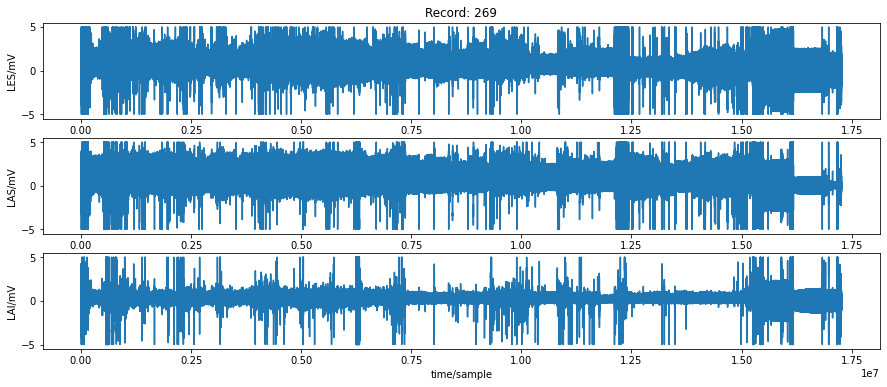

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import statistics as st
from scipy.sparse import csr_matrix
from scipy.signal import find_peaks
from wfdb import processing
from scipy import sparse
from scipy.sparse.linalg import spsolve


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
#print(plt.rcParams.get('figure.figsize'))

record = wfdb.rdrecord('269') 
wfdb.plot_wfdb(record=record) 
#display(record.__dict__)

In [2]:
record.__dict__['record_name']

'269'

In [3]:
display(record.__dict__)

{'record_name': '269',
 'n_sig': 3,
 'fs': 200,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 17278098,
 'base_time': None,
 'base_date': None,
 'comments': ['Produced by snip from record Zymed, beginning at 0'],
 'sig_name': ['LES', 'LAS', 'LAI'],
 'p_signal': array([[-1.132798 , -2.8417605, -3.8964345],
        [-1.132798 , -2.8417605, -3.8964345],
        [-1.0449085, -2.5097335, -3.8769035],
        ...,
        [-0.507806 ,  0.0292965,  0.1660135],
        [-1.17186  ,  0.039062 ,  0.4980405],
        [-0.117186 ,  0.0488275,  0.1855445]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['269.dat', '269.dat', '269.dat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [None, None, None],
 'adc_gain': [102.401310737, 102.401310737, 102.401310737],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'mV'],
 'adc_res': [10, 10, 10],
 'adc_zero': [0, 0, 0],
 'init_value': [-116, -291, -399],
 'c

In [4]:
signals, fields = wfdb.rdsamp('269', channels=[1])
record = wfdb.rdrecord('269', channels=[1])
#record = wfdb.rdrecord('YHPFRM59DE', channels=[0])
signal=signals.reshape(record.sig_len)

In [14]:
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    D = lam * D.dot(D.transpose()) # Precompute this term since it does not depend on `w`
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w) # Do not create a new matrix, just update diagonal values
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

In [15]:
signal_bas=baseline_als(signal[:int(len(signal)/2)],100,0.001)

In [16]:
signal_bas_2=baseline_als(signal[int(len(signal)/2):int(len(signal))],100,0.001)
sub_1=np.subtract(signal[:int(len(signal)/2)],signal_bas)
sub_2=np.subtract(signal[int(len(signal)/2):int(len(signal))],signal_bas_2)
signal_com=np.concatenate((sub_1,sub_2),None)

In [17]:
signal_prep=pd.DataFrame(signal_com)
signal_prep_w=signal_prep.rolling(10).mean() 
x=signal_prep_w.values.reshape(record.sig_len)
peaks_1, _ = find_peaks(x, height=(0.7))

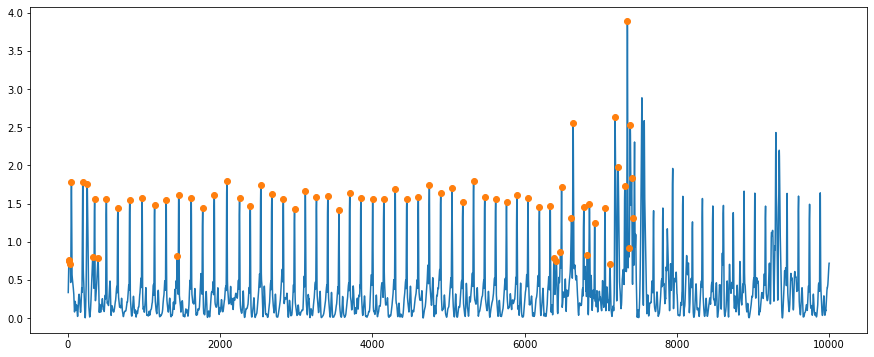

In [18]:
plt.plot(signal_prep_w.values[:10000])
#plt.plot(signal[:4700], "--",)
plt.plot(peaks_1[:70], signal_prep_w.values[peaks_1[:70]], "o")
plt.show()

In [19]:
meanp=np.mean(signal_prep_w.values[peaks_1])
desv=np.std(signal_prep_w.values[peaks_1])

In [20]:
desv

1.1379556045654682

In [21]:
len(peaks_1)

1011418

In [22]:
peaks_out=[]
peaks_pos=[]

In [23]:
for i in range(len(peaks_1)):
    if signal_prep_w.values[peaks_1[i]]>meanp+desv:
        peaks_out.append(signal_prep_w.values[peaks_1[i]])
        peaks_pos.append(peaks_1[i])

In [24]:
len(peaks_out)

106368

In [25]:
meaninn=np.mean(intervalosNN)
stdninn=np.std(intervalosNN)

NameError: name 'intervalosNN' is not defined

In [ ]:
meaninn

In [ ]:
stdninn

In [ ]:
intervalosNN

In [ ]:
nii2=[]
alertas=[]

In [ ]:
for i in range(len(intervalosNN)):
    if intervalosNN[i]>20:
        alertas.append(intervalosNN[i])
        nii2.append(i)

In [ ]:
peaks_1[nii2]

In [ ]:
intervalosNN

In [ ]:
peaks_pos

In [ ]:
nii2

In [ ]:
plt.plot(signal_prep_w)
plt.plot(peaks_1, signal_prep_w.values[peaks_1], "o")
plt.plot(peaks_pos,peaks_out,'o')


In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(signal)-36200,len(signal)),signal_prep_w.values[len(signal)-36200:len(signal)])
#plt.plot(signal[:4700], "--",)
plt.plot(peaks_1[-100:], signal_prep_w.values[peaks_1[-100:]], "o")
plt.show()

In [ ]:
peaks=peaks_1

In [ ]:
plt.figure(figsize=(40, 10))
plt.plot(np.arange(len(signal)),signal_prep_w.values[:len(signal)])
#plt.plot(signal[:4700], "--",)
plt.plot(peaks, signal_prep_w.values[peaks], "o")
plt.show()

In [ ]:
np.sum(np.isnan(peaks)*1)

### Metricas de HRV en el dominio del tiempo

### SDNN

$$ SDNN= \sqrt\frac{\sum_{n=1}^{N}{[RR_{n}-\overline{RR}]^2}}{N-1}$$


In [ ]:
intervalosNN = np.zeros(peaks.shape)

for i in range(len(peaks)-1):
    intervalosNN[i]=peaks[i+1]-peaks[i]
st.stdev(intervalosNN)

### SDANN
$$ SDANN= \sqrt\frac{\sum_{n=1}^{N}{[\overline{RR_{n}}-\overline{\overline{RR}}]^2}}{N-1}$$


In [ ]:
num_seg=int(record.sig_len/(200*60*5))
time_5min=200*60*5

In [ ]:
Useg_5min=np.zeros(num_seg)
seg_5min=np.zeros(num_seg)
temp=0
for i in range(num_seg):
    Useg_5min[i]=temp
    temp=temp+time_5min

In [ ]:
for j in range(len(Useg_5min)-1):
    picos=peaks[(peaks>Useg_5min[j]) & (Useg_5min[j+1]>=peaks)]
    intervalosNN5 = np.zeros(picos.shape)
    for i in range(len(picos)-1):
        intervalosNN5[i]=picos[i+1]-picos[i]
    seg_5min[j]=np.mean(intervalosNN5)

In [ ]:
picos

In [ ]:
seg_5min=np.nan_to_num(seg_5min)

In [ ]:
st.stdev(seg_5min)

## SDNN Index

#### 1. Desviaciones estandar de los intervalos NN en los segmentos de 5 min

In [ ]:
seg_5min_sd=np.zeros(num_seg)
for j in range(num_seg-1):
    picos=peaks[(peaks>Useg_5min[j]) & (Useg_5min[j+1]>=peaks)]
    intervalosNN5 = np.zeros(picos.shape)
    for i in range(len(picos)-1):
        intervalosNN5[i]=picos[i+1]-picos[i]
    if len(intervalosNN5)!=0:
        seg_5min_sd[j]=st.stdev(intervalosNN5)


In [ ]:
np.mean(seg_5min_sd)

## pNN50

In [ ]:
countnn50=0
for i in range(len(intervalosNN)-1):
    if (abs(intervalosNN[i+1]-intervalosNN[i]))>10:
        countnn50+=1
        

In [ ]:
countnn50

In [ ]:
countnn50/len(intervalosNN)*100

## RMSSD

In [ ]:
Sum=0
for i in range(len(intervalosNN)-1):
    Sum=Sum+abs(intervalosNN[i+1]-intervalosNN[i])**2

In [ ]:
np.sqrt(Sum/len(intervalosNN))

In [ ]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values


In [ ]:
from hrvanalysis import get_time_domain_features
time_domain_features = get_time_domain_features(intervalosNN[intervalosNN!=0])


In [ ]:
time_domain_features

In [ ]:
_5MINTEST=find_peaks(x[52500:105000], height=(0.23))

In [ ]:
import pyhrv.tools as tools
nni = tools.nn_intervals(peaks)

In [ ]:
import pyhrv
pyhrv.tools.tachogram(nni=nni,hr=False,sampling_rate=200, interval=[0,17200.0])

In [ ]:
from hrvanalysis import plot_psd
plot_psd(nni, method="welch")
plot_psd(nni, method="lomb")

In [ ]:
from hrvanalysis import get_frequency_domain_features,get_geometrical_features
get_frequency_domain_features(nni[:])

In [ ]:
get_geometrical_features(nni)